In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import seaborn as sns

In [198]:
df = pd.read_csv('maxipolar.csv', sep=';').drop(0)
df = df.set_index('twa/tws')
df

,6,8,10,12,14,16,20
twa/tws,,,,,,,
52,4.76,5.60,6.02,6.19,6.25,6.28,6.28
60,5.03,5.80,6.14,6.35,6.44,6.49,6.49
75,5.23,5.93,6.26,6.52,6.75,6.86,6.94
90,5.17,5.93,6.35,6.65,6.89,7.16,7.45
110,5.04,5.95,6.40,6.83,7.26,7.61,8.06
120,4.87,5.83,6.31,6.73,7.17,7.64,8.61
135,4.37,5.32,6.04,6.43,6.84,7.28,8.35
150,3.68,4.66,5.50,6.09,6.45,6.84,7.68


In [208]:
def performance(tws, twa):
    tws = min(df.columns, key=lambda x: abs(float(x) - tws))
    twa = min(df.index, key=lambda x: abs(x - twa))
    return df[str(tws)][twa]
performance(13.0, 150)

6.09

In [185]:
# TWA * TWS = KT
twa = df['twa/tws']
tws = [float(x) for x in df.columns[1:]]
sow = df.drop('twa/tws', axis=1)
SOW = df.drop('twa/tws', axis=1).to_numpy()
TWA, TWS = np.meshgrid(twa, tws)
f = interpolate.interp2d(TWA, TWS, SOW, kind='linear')

In [134]:
twa2 = np.linspace(0, 180, 60)
tws2 = np.linspace(6, 20, 14)
TWA2, TWS2 = np.meshgrid(twa2, tws2)
SOW2 = f(twa2, tws2)

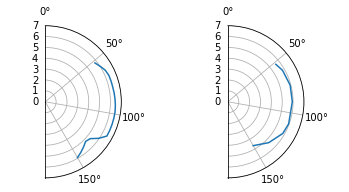

In [186]:
twa2 = np.linspace(52, 150, 20)
sow2 = f(twa2, 8)

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})
ax[0].plot(np.deg2rad(twa2), sow2)
ax[1].plot(np.deg2rad(twa), sow['8'])

for _ax in ax:
    _ax.set_theta_direction(-1)
    _ax.set_theta_zero_location("N")
    _ax.set_thetamax(180)
    _ax.set_rmax(7)
    # _ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    # _ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    _ax.grid(True)

# ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [1]:
fig = plt.figure()
ax = fig.subplots(1,2, subplot_kw=dict(projection="polar"))
for _ax in ax:
    _ax.set_thetamin(0)
    _ax.set_thetamax(180)
ax[0].pcolormesh(TWA, SOW.T, TWS,)
ax[1].pcolormesh(TWA2, SOW2, TWS2)
plt.show()

NameError: name 'plt' is not defined

In [4]:
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
x = linspace(1,4,11)
y = linspace(4,7,22)
z = linspace(7,9,33)
V = zeros((11,22,33))
for i in range(11):
    for j in range(22):
        for k in range(33):
            V[i,j,k] = 100*x[i] + 10*y[j] + z[k]
fn = RegularGridInterpolator((x,y,z), V)
pts = array([[2,6,8],[3,5,7]])
print(fn(pts))

[268. 357.]
